In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/breastcancer.csv')
df.head()

,sr no,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,2,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,3,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,4,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,5,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3de63898b58a33b966929c32c22a23d081554c174d4b63c1ff621ce54c8928d4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-9711285a3f24>", line 2, in <cell line: 2>
    prof.to_file(output_file = 'output2.html')
  File "/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py", line 379, in to_file
    data = self.to_html()
  File "/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py", line 496, in to_html
    return self.html
  File "/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py", line 292, in html
    self._html = self._render_html()
  File "/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py", line 409, in _render_html
    report = self.report
  File "/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py", line 286, in report
    self._report = get_report_structure(self.config, sel

TypeError: object of type 'NoneType' has no len()

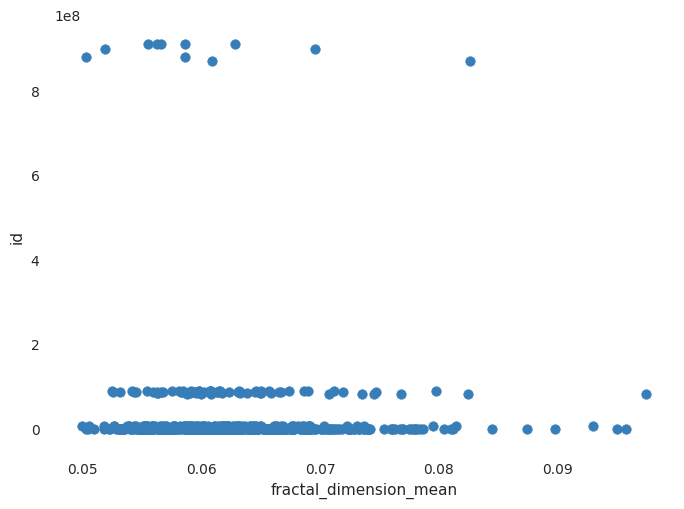

In [ ]:
prof = ProfileReport(df)
prof.to_file(output_file = 'output2.html')

In [ ]:
df.describe()

,sr no,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,164.400426,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,1.000000,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,143.000000,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,285.000000,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,427.000000,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,569.000000,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.columns

Index(['sr no', 'id', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave_points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.shape

(569, 33)

In [ ]:
df.isnull().sum()

,0
sr no,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0


Choosing which model to use , I am thinking of going with randomforestclassifier , linearsvc , kneighboursclassifier, gaussian_nb etc

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Assuming 'diagnosis' is the column you want to one-hot encode
# ohe = OneHotEncoder(sparse_output=False)

# # Fit and transform directly (since the output is already a dense NumPy array)
# diagnosis_encoded = ohe.fit_transform(df[['diagnosis']])

# # If multiple columns are generated by OneHotEncoder, they should be added to the DataFrame as separate columns.
# encoded_columns = ohe.get_feature_names_out(['diagnosis'])
# df[encoded_columns] = diagnosis_encoded

In [ ]:
# df[encoded_columns]

In [ ]:
models = {
    'Logistic Regression' : LogisticRegression() ,
    'Support Vector Machine' : SVC() ,
    'Random Forest Classifier' : RandomForestClassifier() ,
    'k-Nearest Neigbhors' : KNeighborsClassifier() ,
    'Naive Bayes' : GaussianNB()
}

## Splitting our data into training and testing splits

In [ ]:
X = df.drop('diagnosis',axis = 1)
X

,sr no,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,2,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,3,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,4,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,5,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,566,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,567,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,568,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = df['diagnosis']
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((455, 32), (114, 32), (455,), (114,))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to the target variable
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
print(y_train[:10])
print(y_train_encoded[:10])

285    B
174    B
242    B
59     B
132    M
175    B
195    B
291    B
302    M
144    B
Name: diagnosis, dtype: object
[0 0 0 0 1 0 0 0 1 0]


In [ ]:
for name , clf in models.items() :
  clf.fit(X_train, y_train_encoded)
  y_preds = clf.predict(X_test)
  accuracy = accuracy_score(y_test_encoded , y_preds)
  print(f'{name} Accuracy : {accuracy}')

Logistic Regression Accuracy : 0.3333333333333333
Support Vector Machine Accuracy : 0.6491228070175439
Random Forest Classifier Accuracy : 0.9649122807017544
k-Nearest Neigbhors Accuracy : 0.7719298245614035
Naive Bayes Accuracy : 0.6491228070175439


# These are the scores that we got on using different models
Logistic Regression Accuracy : 0.8390243902439024
Support Vector Machine Accuracy : 0.6390243902439025
Random Forest Classifier Accuracy : 0.9853658536585366
k-Nearest Neigbhors Accuracy : 0.7463414634146341
Naive Bayes Accuracy : 0.8048780487804879

### We are now going to go with RandomForestClassifier

In [ ]:
#now we are going to check remove all the duplicate values and then check if we get any imporvements

df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
564,False
565,False
566,False
567,False


In [ ]:
df_unique = df.drop_duplicates()
df_unique.shape

(569, 33)

In [22]:
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at a leaf node
    'bootstrap': [True, False],              # Whether to use bootstrap samples
    'criterion': ['gini', 'entropy']         # Splitting criterion
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and the best accuracy score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Evaluate on the test set
best_rf = grid_search.best_estimator_  # Get the best model from grid search
y_pred = best_rf.predict(X_test)

# Test accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy:  0.956043956043956
Test Set Accuracy: 0.9561


In [23]:
y_encoded = label_encoder.fit_transform(y)

In [24]:
model = RandomForestClassifier(random_state = 42)

cv_scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')

# Print the cross-validated accuracy scores
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Cross-validated accuracy scores: [0.92105263 0.94736842 0.98245614 0.98245614 0.96460177]
Mean accuracy: 0.9596
Standard deviation: 0.0233


In [26]:
len(X_train.columns)

32

In [30]:
# Setting random Seed
tf.random.set_seed(42)

# Creating a model
model1= tf.keras.Sequential([
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

# Compiling the model
model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fitting the model
history1 = model1.fit(X_train , y_train_encoded , epochs = 25)

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3629 - loss: 749380.5625 
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 132431.9375
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5510 - loss: 71943.5078 
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5642 - loss: 81632.4844 
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5125 - loss: 32169.8711 
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 126851.0078
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5198 - loss: 34882.3438  
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 116785.9375
Epoch 9/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5204 - loss: 32499.9277
Epoch 10/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 104052.3906
Epoch 11/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4817 - loss: 5738.5654 
Epoch 12/25
15/15 ━

## Trying to use a much more complex neural network

In [35]:
# Setting random Seed
tf.random.set_seed(42)

# Creating a model
model1= tf.keras.Sequential([
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

# Compiling the model
model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fitting the model
history1 = model1.fit(X_train , y_train_encoded , epochs = 100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3629 - loss: 1754507.2500
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 250837.6875
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5468 - loss: 139290.7031
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5443 - loss: 152108.0156 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5217 - loss: 6918.7778 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5543 - loss: 2950.7742
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6304 - loss: 239946.4219
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5840 - loss: 106895.9219
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5461 - loss: 36047.4375 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 170770.4062
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4836 - loss: 188372.0625 
Epoch 12

In [36]:
tf.random.set_seed(42)

# Creating a model
model1= tf.keras.Sequential([
    tf.keras.layers.Dense(32 , activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

# Compiling the model
model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

# Fitting the model
history1 = model1.fit(X_train , y_train_encoded , epochs = 100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5468 - loss: 391067.0625
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6346 - loss: 106856.3125
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5868 - loss: 59805.9727
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6362 - loss: 128638.9688
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 63323.8242 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 128751.6641 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4072 - loss: 4835.8052 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5372 - loss: 28877.3281  
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 65841.1172  
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4836 - loss: 95809.3438 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5794 - loss: 142169.6562
Epoch 1

## The neural network is not able to perform well on this dataset , irrespective of the complexity of the model.

## It gives accuracy in the range of 40-60 , so its basically guessing for binary classifaction problem